## 「傾き」を求める微分
  
#### <b>1次関数の傾き</b>  
>例えば、秒速5.0㎝で落下する桜の花びらのX秒後の移動距離Yについて  
><div style="text-align:center;"><b>
    「傾き」= 単位時間あたりの変化量 = 速度 と言える
</b></div>

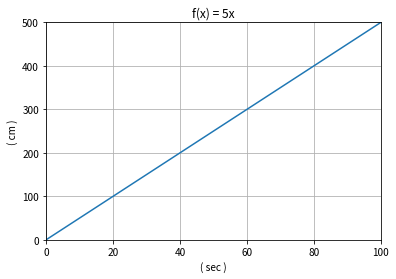

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Noto Sans JP'

N = 1000
xmin = 0
xmax = 100
def f(x):
    return 5 * x

# 指定範囲間のN(60)個の数値を配列に入れる
p = np.linspace( xmin, xmax, N)

fig, ax = plt.subplots()

# その配列を回してp配列の各数値をf(x)に代入して得た値をプロット
ax.plot( p, [f(p[k]) for k in range(N)] )

ax.set_xlim(0, 100)
ax.set_ylim(0, 500)
ax.grid(True)

plt.title("f(x) = 5x")
plt.xlabel("( sec )")
plt.ylabel("( cm )")
plt.show()

In [37]:
def katamuki(x1,x2,y1,y2): # 2点の座標(x,y)を引数に傾きを求める式を作成
    print("傾き：" + str(round((y1 - y2)/(x1 - x2),2)))
    return round((y1 - y2)/(x1 - x2),2)
    
# p配列に入力された値を適当に取り出して関数に入れる(x=15とx=20)
katamuki(p[15],p[20],f(p[15]),f(p[20]));

傾き：5.0


<b>1次関数であれば傾きは一定となり微分は必要ない</b>

### <strong>多次元関数や指数関数の傾き</strong>  
>例えば、刻一刻と落下速度を変化させる桜の花びらのX秒時点の移動距離Yについて    
><b>XとYの関係性が関数で表せるのなら(y = f(x))、微分によって傾きも関数で表せる</b>

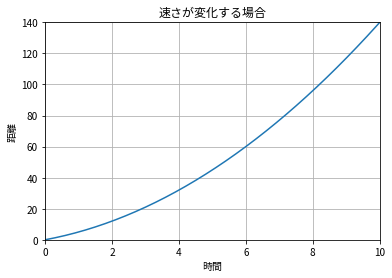

In [51]:
N = 1000
xmin = 0
xmax = 100
def f(x):
    if x < 0:
        return 0
    else:
        return x**2 + 4 * x

p = np.linspace( xmin, xmax, N)

fig, ax = plt.subplots()
ax.plot( p, [f(p[k]) for k in range(N)] )

ax.set_xlim(0, 10)
ax.set_ylim(0, 140)
ax.grid(True)

plt.title("速さが変化する場合")
plt.xlabel("時間")
plt.ylabel("距離")
plt.show()

例えば上記のグラフ
$$ y = x^2 + 4x + 4\\ $$
を微分し、傾きを導く関数を求める

In [44]:
import sympy as sym
from sympy.plotting import plot
sym.init_printing(use_unicode=True)
%matplotlib inline
# シンボルを登録
a, b, c, x, y = sym.symbols("a b c x y")

expr = x ** 2 + 4 * x - 4
# 微分
sym.Derivative(expr)

In [45]:
# 微分を計算する
expr2 = sym.Derivative(expr).doit()
expr2

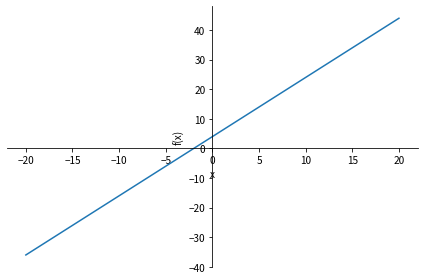

In [41]:
# グラフ
plot(expr2,(x, -20 , 20))

<b>微分の結果</b>  
$$ y = x^2 + 4x + 4 \\ $$
で表せる桜の落下距離Yと時間Xについてt秒時点の桜の落下速度は 


$$ \\ f(t) = 2t + 4 \\ $$
となる。例えば４秒時点なら秒速8㎝

### <b>この微分計算のポイント</b>  
#### <b>この例でいうと傾きは時間あたりの変化量（変化の割合）であるが、Xの特定の範囲の傾きを求めるのではなく、特定の時点の傾きを求めている</b>  
<img src="./biseki/katamuki.png">  
例えば上記グラフでは  
$$a = \frac{f(x_2)-f(x_1)}{x_2-x_1}\\ $$
のように、傾きを導く関数を表せるがこれでは特定の2点間(範囲)の傾きしか求める事ができない  
そのため、X1とX2の距離を限りなく近づける。ただし完全に重なるとx,yの増加量がどちらも0となり傾きは 0/0 となってしまう  
そこで<b>極点</b>の考えが必要となる  

関数fに対し、変数hをaに近づけていった際、f(h)が近づく値をlimと表す  


$$ \lim_{\substack{h \to a}} f(h) \\ $$  

例えば、hを限りなく0に近づけた時に3hが限り近づく値は0である  
<b>ややこしいのは、限りなく近づけるだけであって、h=0になってはいけないという点</b> 

$$ \lim_{\substack{h \to 0}} 3h = 0 \\ $$  


この極点の考え方を先ほどのグラフの傾きに当てはめる　
<img src="./biseki/katamuki2.png">  

$$ a = \lim_{\substack{h \to 0}}  \frac{f(x+h)-f(x)}{(x+h)-x}　\\
     = \lim_{\substack{h \to 0}}  \frac{f(x+h)-f(x)}{h}
$$  


Ｘの値によって1つの値(傾き)を求める事ができる  
この式を<b>導関数:f(x)</b>と呼び、<b>微分とはこの導関数を求める計算の事</b>  
<b>極点はグラフの接点となり、ある接点におけるグラフの傾きは接線の傾きと一致する</b>  
あってます？

導関数を表す場合f(x)を

$$ \frac{d}{dx}f(x) $$ または　$$ \frac{df}{dx}(x) $$ と表すこともできる

### 結論:微分で傾きを導くための関数がわかる



ここに書いてありした
[結城浩 on Twitter: "質問（微分の何が嬉しいか）](https://twitter.com/hyuki/status/1206882565228875776)

参考サイト  
[中学数学からはじめる微分積分](https://www.youtube.com/watch?v=4p1rwfXbCoY)  
[微分とは何か？ ](https://sci-pursuit.com/math/differential-1.html)